In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

from glob import glob
path_files = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_SpeedBump/alpha_no_optical_{}mm.root"
file_list = glob(path_files.format("*"))[:3]
print(file_list)

from LoadMultiFiles import LoadOneFileUproot

from FunctionFor_dE_dx import GetDirForNoOpticalAnalyze
from copy import copy

dir_LS_diff_L = {}
dir_geninfo_diff_L = {}
dir_dE_dx_diff_L = {}
dir_key_to_float = {}
for file in file_list:
    key = file.split("_")[-1].split("mm.root")[0]
    key_float  = float(key)
    dir_key_to_float[key] = key_float
tuple_key_to_float_sorted = sorted(dir_key_to_float.items(), key=lambda x: x[1])
print(tuple_key_to_float_sorted)

for key in tuple_key_to_float_sorted:
    key = key[0]
    file = path_files.format(key)
    dir_LS = LoadOneFileUproot(file, name_branch="GdLS_log",
                           return_list=False)
    dir_geninfo = LoadOneFileUproot(file, name_branch="genInfo",
                           return_list=False)
    # pdgID_certain,dir_dE_dx =GetDirForNoOpticalAnalyze(dir_LS,dir_geninfo)
    dir_LS_diff_L[key] = copy(dir_LS)
    dir_geninfo_diff_L[key] = copy(dir_geninfo)
    # dir_dE_dx_diff_L[key] = copy(dir_dE_dx)



['/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_SpeedBump/alpha_no_optical_0.5mm.root', '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_SpeedBump/alpha_no_optical_0.1mm.root', '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_diff_L_SpeedBump/alpha_no_optical_2.5mm.root']
[('0.1', 0.1), ('0.5', 0.5), ('2.5', 2.5)]


In [2]:
dir_v_max_Ek = {}
for key in dir_LS_diff_L.keys():
    v_Ek = []
    dir_LS = dir_LS_diff_L[key]
    for v_step_Ek in dir_LS["step_KineticE"]:
        v_Ek.append(np.max(v_step_Ek))
    dir_v_max_Ek[key] = np.array(v_Ek)
# print(len(v_Ek))

# print(dir_LS_diff_L["0.5"]["step_KineticE"])

Text(0.5, 0, 'Beam Energy [ MeV/u ]')

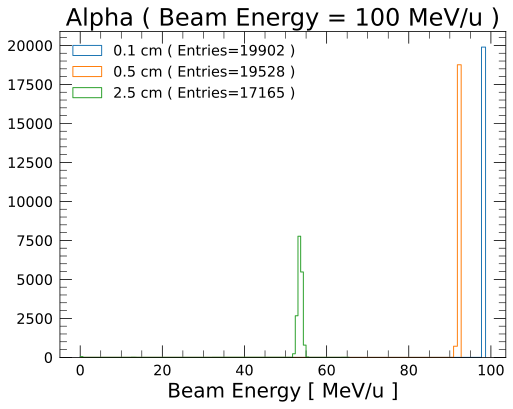

In [3]:
for key in dir_v_max_Ek.keys():
    plt.hist(dir_v_max_Ek[key]/4, bins=100, label=f"{key} cm ( Entries={len(dir_v_max_Ek[key])} )", histtype="step")
plt.title("Alpha ( Beam Energy = 100 MeV/u )")
plt.legend(loc="upper left")
plt.xlabel("Beam Energy [ MeV/u ]")

In [ ]:
from importlib import reload
import RooFitTools
reload(RooFitTools)
from RooFitTools import FitFromArray
x_max = 100
x_min = -50
v_time_arrive_fit = []
v_time_arrive_error = []
for i,(L_SpeedBump,v_max_Ek) in enumerate(dir_v_max_Ek.items()):
    FitFromArray(v_max_Ek, xlabel="Beam Energy [ MeV/u ] ")

    break

OBJ: TStyle	dybStyle	Daya Bay Style : 0 at: 0x5634ab33aa60
Welcome to JupyROOT 6.22/02
392.814152414491
